# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook and a `.txt` file (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

Place your notebook and `.txt` files **only** in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 3 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [1]:
from __future__ import print_function, division
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


## Description of the dataset
In this assignment our goal is to recognize objects from 19 dierent visual classes (e.g. person, dog, cat, car, ...) in realistic scenes. The dataset consists of several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

Here we will focus on a single classiffication task: you will be required to classify images as to whether or not they contain a person. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. That is, each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 diffeerent visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image). Our dataset with all images is thus a $N \times 500$ dimensional matrix where `N` is the number of images. The resulting representation is much more compact and can be used directly to perform classiffication.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) correspond to the normalized count vector. The last 19 attributes (`is_class`) indicate the presence of at least one object of a particular class in the image. In most of the experiments (unless explicitly noted otherwise) you will be asked to train classiffiers for classifying person vs. non-person images and only the `is_person` attribute and the 500 dimensional feature vector will be used. Do not use the additional class indicator attributes as features unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

*Important: Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 ==========
Load the datasets `train_images_partA.csv` and `valid_images_partA.csv` into two pandas DataFrame called `train_A` and `valid_A`. Display the number of data points and attributes in each of the two datasets.

In [7]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
print('train_A: Number of instances: {}, number of attributes: {}'.format(train_A.shape[0], train_A.shape[1]))
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')
print('valid_A: Number of instances: {}, number of attributes: {}'.format(valid_A.shape[0], valid_A.shape[1]))

train_A: Number of instances: 2093, number of attributes: 520
valid_A: Number of instances: 1113, number of attributes: 520


### ========== Question 1.2 ==========
Display and inspect the first 10 instances in the training dataset.

In [81]:
train_A.head(10)


,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 ==========
In this part we want to select the appopriate attributes (i.e. input features) for training our classifiers. These should be the attributes `dim1, dim2, ..., dim500`. Create a list which has as elements the **names** of the attributes of interest. 

In [22]:
feature_names = train_A.columns[1:501].values

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` and store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets (also make sure you do not include this attribute in your training features). Display the dimensionalities (i.e shapes) of the 4 arrays and make sure your input data are 500-dimensional.

In [8]:
X_tr  = train_A[feature_names]
X_val = valid_A[feature_names]
y_tr  = train_A['is_person']
y_val = valid_A['is_person']
print("the shape of train input:{0}, the shape of valid input:{1}".format(X_tr.shape, X_val.shape))

the shape of train input:(2093, 500), the shape of valid input:(1113, 500)


### ========== Question 1.5 ==========
Show two [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) of the targets in a single plot, one for the training and one for the validation set. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

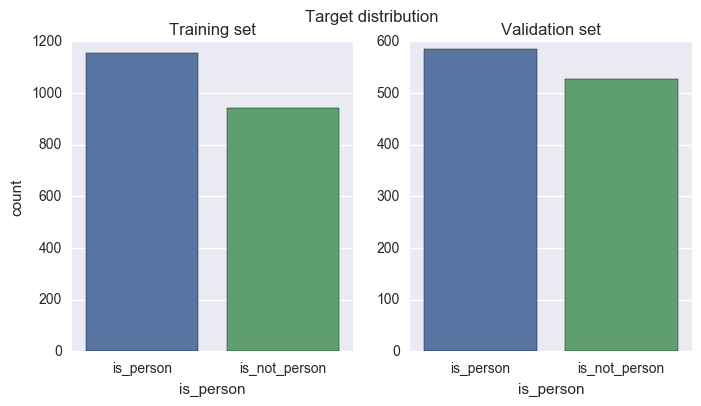

In [84]:
d1label = ['is_person', 'is_not_person']
d2label = ['is_person', 'is_not_person']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
sns.countplot(y_tr, ax=ax1)
ax1.set_title('Training set', size=12)
ax1.set_xticklabels(d1label)

sns.countplot(y_val, ax=ax2)
ax2.set_xticklabels(d2label)
ax2.set_ylabel(' ')
ax2.set_title('Validation set', size=12)
fig.suptitle('Target distribution', size=12)
plt.show()


### ========== Question 1.6 ==========
What would be a good choice for a baseline classifier to compare your results in the next steps against? What classification accuracy score does the baseline classifier achieve in the validation set?

I think the baseline classifier should be the prior probability.



In [56]:
person_num = np.count_nonzero(y_tr)
accuracy = (y_tr.shape[0] - person_num )/ y_tr.shape[0]
print("the classification accuracy score:",accuracy)

the classification accuracy score: 0.55088389871


### ========== Question 1.7 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score in the training and validation sets and compare to that of the baseline classifier. Comment in 1-2 sentences the results. You may include any additional plot(s) if you wish to justify your explanation.

In [86]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_tr, y_tr)))
print('Classification accuracy on valid set: {:.3f}'.format(lr.score(X_val, y_val)))

Classification accuracy on training set: 0.551
Classification accuracy on valid set: 0.527


Comparing to the accuracy of baseline classifier, the accuracy on training set is the same. This is because LogisticRegression is based on maximum likelihood.

 

### ========== Question 1.8 ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [11]:
X_tr_five = X_tr[X_tr.columns[0:5]]
mean_X_tr_five = np.mean(X_tr_five, axis=0)
std_X_tr_five = np.std(X_tr_five, axis=0)
np.set_printoptions(precision=3)
print("the means of first 5 features:{0}".format(mean_X_tr_five.values))
print("the standard deviations of first 5 features:{0}".format(std_X_tr_five.values))


the means of first 5 features:[ 0.002  0.001  0.004  0.002  0.002]
the standard deviations of first 5 features:[ 0.001  0.001  0.004  0.001  0.002]


### ========== Question 1.9 ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers an [implementation](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) of feature standardisation. Create a standardiser and fit it by using training features only. Then transform both your input and validation input features. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. 

**IMPORTANT: You should use the transformed data for the rest of part A**.

In [12]:
standardiser = StandardScaler()
standardiser.fit(X_tr)
X_tr  = standardiser.transform(X_tr)
X_val = standardiser.transform(X_val)

mean_X_tr_five = X_tr.mean(axis=0)
mean_X_tr_five = mean_X_tr_five[:5]
std_X_tr_five  = X_tr.std(axis=0)
std_X_tr_five  = std_X_tr_five[:5]
mean_X_val_five = X_val.mean(axis=0)
mean_X_val_five = mean_X_val_five[:5]
std_X_val_five  = X_val.std(axis=0)
std_X_val_five  = std_X_val_five[:5]
print("the means of first 5 features:{0}".format(mean_X_tr_five))
print("the standard deviations of first 5 features:{0}".format(std_X_tr_five))
print("the means of first 5 features:{0}".format(mean_X_val_five))
print("the standard deviations of first 5 features:{0}".format(std_X_val_five))

the means of first 5 features:[ -3.395e-17  -2.207e-17   2.444e-16   1.426e-16  -5.771e-17]
the standard deviations of first 5 features:[ 1.  1.  1.  1.  1.]
the means of first 5 features:[-0.006 -0.038  0.109  0.094  0.031]
the standard deviations of first 5 features:[ 1.013  0.97   1.049  1.057  0.975]


Yes. Because the means of first 5 features on training set are nearly zero and the standard deviations are 1, which should be what it is expected to be. However, the means and the standard deviations on valid set are not that case because we use the standardiser fitted by training set to transform the valid set.

### ========== Question 1.10 ==========
By using the transformed input data, retrain a `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy in both the training and validation sets. How does your model compare to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [89]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_tr, y_tr)))
print('Classification accuracy on valid set: {:.3f}'.format(lr.score(X_val, y_val)))


Classification accuracy on training set: 0.811
Classification accuracy on valid set: 0.643


It improves a lot comparing to 1.6 because pre-processing is very important.


### ========== Question 1.11 ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes for the weight vector. Thus, it helps us prevent overfitting and, for logistic regression, it additionally controls the level of confidence in making predictions.

We would like to optimise this parameter **by using the transformed training dataset only** and not the validation set. Create a 3-fold cross-validation object for the training dataset. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples in each iteration fold.

In [13]:
num = 1
n = X_tr.shape[0]
kf = KFold(n, n_folds=3, shuffle=True, random_state=0)
for train_indices, test_indices in kf:
    print("the number of test samples in fold {0}: {1}".format(num,test_indices.shape[0]))
    num += 1


the number of test samples in fold 1: 698
the number of test samples in fold 2: 698
the number of test samples in fold 3: 697


### ========== Question 1.12 ========== 
Now we want to test out different settings for the regularisation parameter `C` by using the cross-validation iterator from the previous question. For each iteration, we want to train multiple classifiers by using a range of values for `C` and then compute the performance within each CV fold. You should use a log-range for `C` from `1e-5` to `1e5` by using 20 equally-spaced values *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters.

*(hint: your may want to use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [14]:
fold = 0
arr = [[]]
C_range = np.logspace(-5, 5, num=20)
for train_indices, test_indices in kf:
    for C in C_range:
        lr = LogisticRegression(solver='lbfgs',C=C)
        lr.fit(X_tr[train_indices], y_tr[train_indices])
        score = lr.score(X_tr[test_indices], y_tr[test_indices])
        arr[fold].append(score)
    fold += 1
    if fold < 3:
        arr.append([])


### ========== Question 1.13 ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

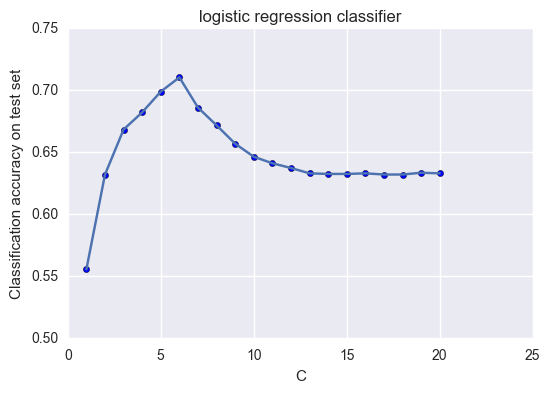

In [92]:
C_List = np.arange(1,21)
mean_score = np.mean(arr, axis=0)
plt.scatter(C_List,mean_score)
plt.plot(C_List,mean_score, )
plt.xlabel('C')
plt.ylabel('Classification accuracy on test set')
plt.title('logistic regression classifier')
plt.show()

### ========== Question 1.14 ==========
Find and display the optimal value for the regularisation parameter `C` of the logistic classifier by using your results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [93]:
optimal_value = mean_score.argmax()
C_optimal = C_range[optimal_value]
lr = LogisticRegression(solver='lbfgs',C=C_optimal)
lr.fit(X_tr, y_tr)
score = lr.score(X_val, y_val)
print("the optimal value of C is:",C_optimal)
print("the classification accuracy on the validation set:",score)

the optimal value of C is: 0.00428133239872
the classification accuracy on the validation set: 0.696316262354


### ========== Question 1.15 ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Can you verify that your results are consistent with those from Question 1.14?

In [16]:
lrCV = LogisticRegressionCV(Cs=list(np.logspace(-5, 5, num=20)),cv=kf,solver='lbfgs')
lrCV.fit(X_tr,y_tr)
print("C:",lrCV.C_)
print ('Max auc_roc:', lrCV.score(X_val,y_val))

C: [ 0.004]
Max auc_roc: 0.696316262354


### ========== Question 1.16 ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 31 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [17]:
rf = RandomForestClassifier(n_estimators=500, random_state=31, criterion='entropy')
rf.fit(X_tr, y_tr)
print("accuracy on training sets:",rf.score(X_tr, y_tr))
print("accuracy on valid sets:",rf.score(X_val, y_val))

accuracy on training sets: 1.0
accuracy on valid sets: 0.698113207547


### ========== Question 1.17 ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

The result is expected. Because the randomforestclassifer is a kind of decision tree, it should be overfitting on train dataset. This is why the accuracy of valid sets is not good as the train sets.


### ========== Question 1.18 ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [26]:
index = np.argsort(-rf.feature_importances_)
feature_name = train_A.columns.values
feature_name = feature_name[index+1]
feature_name = feature_name[:50]
print("names of the 50 most important features:",feature_name)

names of the 50 most important features: ['dim21' 'dim479' 'dim51' 'dim360' 'dim283' 'dim76' 'dim4' 'dim461'
 'dim274' 'dim330' 'dim263' 'dim343' 'dim348' 'dim217' 'dim222' 'dim347'
 'dim74' 'dim356' 'dim398' 'dim423' 'dim500' 'dim73' 'dim485' 'dim214'
 'dim326' 'dim254' 'dim483' 'dim92' 'dim25' 'dim322' 'dim329' 'dim427'
 'dim17' 'dim288' 'dim90' 'dim440' 'dim48' 'dim206' 'dim171' 'dim154'
 'dim134' 'dim54' 'dim96' 'dim315' 'dim85' 'dim312' 'dim15' 'dim35'
 'dim188' 'dim442']


### ========== Question 1.19 ==========
Next, we would like to test out the performance of support vector classification and experiment with different kernels. 
By using training data only and default parameter settings, train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [27]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
print('linear SVC classification accuracy on training set: {:.3f}'.format(svc_linear.score(X_tr, y_tr)))
print('linear SVC classification accuracy on valid set: {:.3f}'.format(svc_linear.score(X_val, y_val)))
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on valid set: {:.3f}'.format(svc_rbf.score(X_val, y_val)))
print('Poly SVC classification accuracy on training set: {:.3f}'.format(svc_poly.score(X_tr, y_tr)))
print('Poly SVC classification accuracy on valid set: {:.3f}'.format(svc_poly.score(X_val, y_val)))


linear SVC classification accuracy on training set: 0.842
linear SVC classification accuracy on valid set: 0.639
RBF SVC classification accuracy on training set: 0.911
RBF SVC classification accuracy on valid set: 0.730
Poly SVC classification accuracy on training set: 0.991
Poly SVC classification accuracy on valid set: 0.702


### ========== Question 1.20 ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the results by using 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [28]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

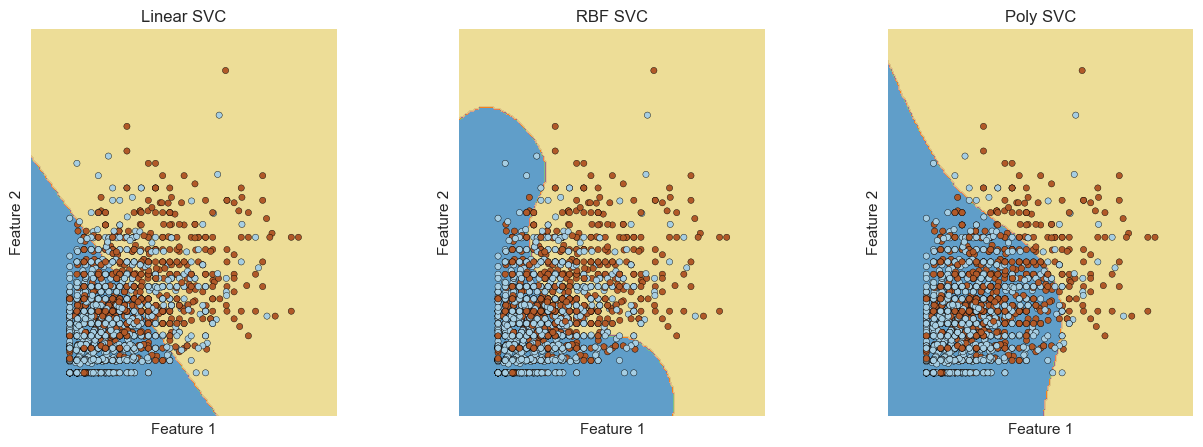

In [29]:
X = X_tr[:,[20,75]]
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr[:,[20,75]], y_tr)
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr[:,[20,75]], y_tr)
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr[:,[20,75]], y_tr)
clfs = (svc_linear,svc_rbf,svc_poly)
titles = ['Linear SVC','RBF SVC','Poly SVC']
show_svc_decision_boundaries(clfs, X, title=titles)

We can see that different kernels have different dicision boundaries, but all the dicision boundaries do not seperate different class accurately. So we can not only use 2D input data to decide which kernel we should use.

### ========== Question 1.21 ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [174]:
fold = 0
arr = [[]]
C_range = np.logspace(-2, 3, 10)
for train_indices, test_indices in kf:
    for C in C_range:
        svc_rbf = SVC(kernel='rbf', gamma='auto', C=C)
        svc_rbf.fit(X_tr[train_indices], y_tr[train_indices])
        score = svc_rbf.score(X_tr[test_indices], y_tr[test_indices])
        arr[fold].append(score)
    fold += 1
    if fold < 3:
        arr.append([])



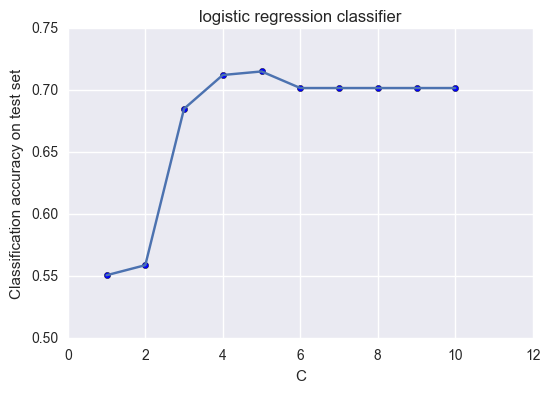

In [175]:
C_List = np.arange(1,11)
mean_score = np.mean(arr, axis=0)
plt.scatter(C_List,mean_score)
plt.plot(C_List,mean_score, )
plt.xlabel('C')
plt.ylabel('Classification accuracy on test set')
plt.title('logistic regression classifier')
plt.show()

In [176]:
optimal_value = mean_score.argmax()
C_optimal = C_range[optimal_value]
print("the highest obtained mean accuracy score is:{0}and the value of C is:{1}".format(mean_score.max(),C_optimal))
svc_rbf = SVC(kernel='rbf', gamma='auto', C=C_optimal)
svc_rbf.fit(X_tr,y_tr)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on valid set: {:.3f}'.format(svc_rbf.score(X_val, y_val)))


the highest obtained mean accuracy score is:0.715230644637and the value of C is:1.6681005372
RBF SVC classification accuracy on training set: 0.975
RBF SVC classification accuracy on valid set: 0.728


# ========== Question 1.22 ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [183]:
fold = 0
arr = [[]]
gamma_range = np.logspace(-5, 0, 10)
for train_indices, test_indices in kf:
    for gamma in gamma_range:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=1.0)
        svc_rbf.fit(X_tr[train_indices], y_tr[train_indices])
        score = svc_rbf.score(X_tr[test_indices], y_tr[test_indices])
        arr[fold].append(score)
    fold += 1
    if fold < 3:
        arr.append([])

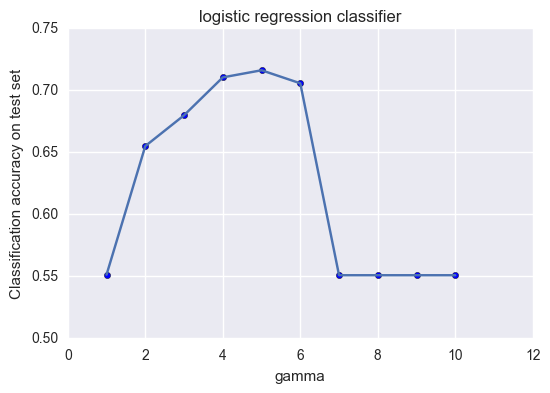

In [184]:
gamma_List = np.arange(1,11)
mean_score = np.mean(arr, axis=0)
plt.scatter(gamma_List,mean_score)
plt.plot(gamma_List,mean_score, )
plt.xlabel('gamma')
plt.ylabel('Classification accuracy on test set')
plt.title('logistic regression classifier')
plt.show()

In [185]:
optimal_value = mean_score.argmax()
gamma_optimal = gamma_range[optimal_value]
print("the highest obtained mean accuracy score is:{0}and the value of gamma is:{1}".format(mean_score.max(),gamma_optimal))
svc_rbf = SVC(kernel='rbf', gamma=gamma_optimal, C=1.0)
svc_rbf.fit(X_tr,y_tr)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on valid set: {:.3f}'.format(svc_rbf.score(X_val, y_val)))

the highest obtained mean accuracy score is:0.716185754475and the value of gamma is:0.0016681005372
RBF SVC classification accuracy on training set: 0.891
RBF SVC classification accuracy on valid set: 0.727


### ========== Question 1.23 ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

In [32]:
fold = 0
arr = [[]]
gamma_range = np.logspace(-4, -1, 4)
C_range = np.logspace(-2, 1, 4)
for gamma in gamma_range:
    for C in C_range:
        svc_rbf = SVC(kernel='rbf', gamma=gamma, C=C)
        svc_rbf.fit(X_tr, y_tr)
        score = svc_rbf.score(X_val, y_val)
        arr[fold].append(score)
    fold += 1
    if fold < 4:
        arr.append([])

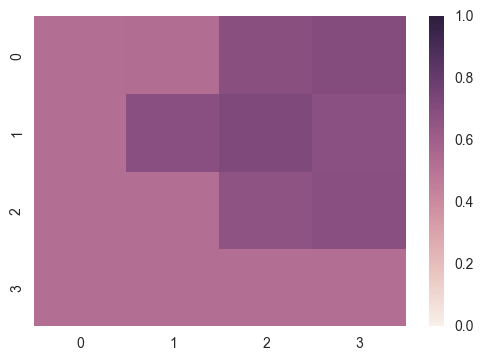

In [33]:
sns.heatmap(arr,vmin=0,vmax=1)

In [190]:
arr = np.array(arr)
itemindex = np.argwhere(arr == arr.max())  
gamma_optimal = gamma_range[itemindex[0][0]]
C_optimal = C_range[itemindex[0][1]]
print("the best gamma is:{0}and the value of C is:{1}".format(gamma_optimal,C_optimal))
svc_rbf = SVC(kernel='rbf', gamma=gamma_optimal, C=C_optimal)
svc_rbf.fit(X_tr, y_tr)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_rbf.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on valid set: {:.3f}'.format(svc_rbf.score(X_val, y_val)))

the best gamma is:0.001and the value of C is:1.0
RBF SVC classification accuracy on training set: 0.835
RBF SVC classification accuracy on valid set: 0.721


### ========== Question 1.24 ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

No. In previous questions, we only use one variable to find the optimal value. But in question 1.23, we use two variables to find the both two optimal values. We cannot say the both two optimal values guarantee the maximum accuracy than the two seperately.

### ========== Question 1.25 ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [34]:
fold = 0
arr = [[]]
degree_range = np.arange(1,8)
for train_indices, test_indices in kf:
    for degree in degree_range:
        svc_poly = SVC(kernel='poly', degree=degree)
        svc_poly.fit(X_tr[train_indices], y_tr[train_indices])
        score = svc_poly.score(X_tr[test_indices], y_tr[test_indices])
        arr[fold].append(score)
    fold += 1
    if fold < 3:
        arr.append([])

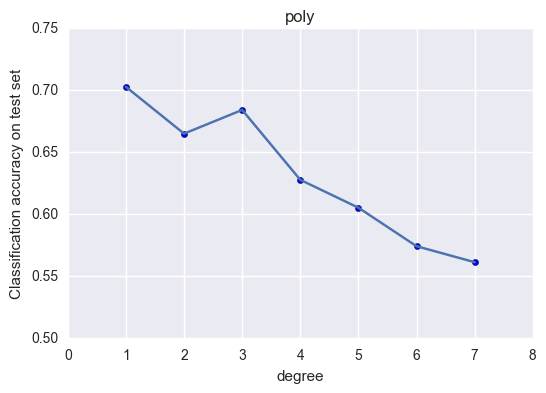

In [35]:
mean_score = np.mean(arr, axis=0)
plt.scatter(degree_range,mean_score)
plt.plot(degree_range,mean_score, )
plt.xlabel('degree')
plt.ylabel('Classification accuracy on test set')
plt.title('poly')
plt.show()

In [193]:
optimal_value = mean_score.argmax()
degree_optimal = degree_range[optimal_value]
print("the highest obtained mean accuracy score is:{0}and the value of degree is:{1}".format(mean_score.max(),degree_optimal))
svc_poly = SVC(kernel='poly', degree=degree_optimal)
svc_poly.fit(X_tr,y_tr)
print('RBF SVC classification accuracy on training set: {:.3f}'.format(svc_poly.score(X_tr, y_tr)))
print('RBF SVC classification accuracy on valid set: {:.3f}'.format(svc_poly.score(X_val, y_val)))

the highest obtained mean accuracy score is:0.702810105802and the value of degree is:1
RBF SVC classification accuracy on training set: 0.784
RBF SVC classification accuracy on valid set: 0.689


### ========== Question 1.26 ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

I think it is a good idea because cross-validation and valid set should be totally separated. In this part, we do not have the test set, so we can use the valid set to test. That is to say, valid set is assumed to be unknown to modeller. If you tune parameters on training set and valid set, then when you try to apply your model (tuned from your training set and valid set), you will get a "better" test MSE. But in fact,  the 'true' MSE is anticipated to be higher. Namely, your model performance will be too good to be true.

ad(cross-valid):reduces chances of getting an unusual (biased) testing set. So in the situation that we do not have enough dataset, we can seperate the train set into train and valid.
disadvantage(cross-valid):reduces the number of data to train the model.
ad(validation set):make full use of the training set.
disadvantage(validation set):gets an unusual biased.

### ========== Question 1.27 ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [39]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
train_A = train_A.drop("imgId", axis=1)
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')
valid_A = valid_A.drop("imgId", axis=1)

X_tr  = train_A.drop("is_person", axis=1)
X_val = valid_A.drop("is_person", axis=1)
y_tr  = train_A['is_person']
y_val = valid_A['is_person']

In [40]:
standardiser = StandardScaler()
standardiser.fit(X_tr)
X_tr  = standardiser.transform(X_tr)
X_val = standardiser.transform(X_val)

rf = RandomForestClassifier(n_estimators=500, random_state=31, criterion="entropy")
rf.fit(X_tr, y_tr)
print("accuracy on training sets:",rf.score(X_tr, y_tr))
print("accuracy on valid sets:",rf.score(X_val, y_val))


accuracy on training sets: 1.0
accuracy on valid sets: 0.711590296496


In [42]:
index = np.argsort(-rf.feature_importances_)
feature_name = train_A.columns.values
feature_name = feature_name[index]
feature_name = feature_name[:50]
print("names of the 50 most important features:",feature_name)

names of the 50 most important features: ['is_cat' 'is_bird' 'dim21' 'dim51' 'dim360' 'dim4' 'dim76' 'dim398'
 'dim283' 'dim479' 'dim263' 'dim343' 'dim423' 'dim485' 'dim254' 'dim461'
 'dim222' 'dim356' 'dim74' 'dim288' 'dim214' 'dim348' 'dim330' 'dim217'
 'dim483' 'dim90' 'dim274' 'dim347' 'dim17' 'dim427' 'dim35' 'dim326'
 'dim73' 'dim312' 'dim48' 'dim25' 'dim315' 'dim322' 'dim329' 'dim500'
 'dim134' 'dim206' 'is_aeroplane' 'dim96' 'dim353' 'dim442' 'dim77'
 'dim440' 'dim171' 'dim154']


(1)I find that there are extra features beyond dim, such as is_cat and so on.
(2)I find that the performance of more features is betther than previous one. Because more features are provided. For example, the model learns that the picture belongs to 'is_cat' so that it must do not have person. So it provides more information for the model to make the judgement.
(3)It is not easy to use this result in practice because we only learn some pictures,for instance,contain cat and meanwhile do not contain person. It would be too arbitrary to judge a picture that does not contain a person only based on is_cat.




## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classiffier you like (with the provison that you can explain what the classiffier/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the posterior probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated posterior probabilities for the data points in the test set into a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. You are then required to copy this file into your submission folder along with your notebook (see Mecanics section at the top of the notebook) and then submit the two files by using the `submit` command on DICE. You are only required to use the `submit` command once.

*Your answer goes here (max. 600 words)*



In [2]:
from __future__ import print_function, division
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
%matplotlib inline

In [5]:
#load dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path, delimiter = ',')

#remove useless features
feature_names = train_B.columns[1:501].values
X_tr  = train_B[feature_names]
X_val = valid_B[feature_names]
y_tr  = train_B['is_person']
y_val = valid_B['is_person']
X_test = test_B[feature_names]


svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(X_tr, y_tr)

pred_proba = svc_rbf.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)

print('raw data with any processing')
print('RBF SVC classification logloss on valid set: {:.3f}'.format(this_logloss))




raw data with any processing
RBF SVC classification logloss on valid set: 0.693


In [101]:
#pre-processing: Normalizer

normalizer = Normalizer()
X_tr  = normalizer.fit_transform(X_tr)
X_val = normalizer.fit_transform(X_val)
X_test = normalizer.fit_transform(X_test)
#pre-processing: StandardScaler
standardiser = StandardScaler()
X_tr  = standardiser.fit_transform(X_tr)
X_val = standardiser.fit_transform(X_val)
X_test = standardiser.fit_transform(X_test)

svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(X_tr, y_tr)

pred_proba = svc_rbf.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)

print('data pre-processing')
print('RBF SVC classification logloss on valid set: {:.3f}'.format(this_logloss))



data pre-processing
RBF SVC classification logloss on valid set: 0.551


feature selection


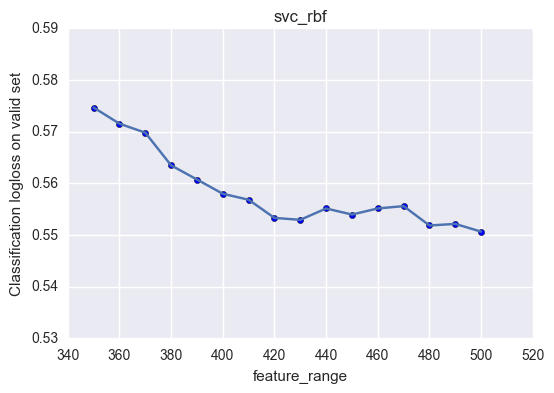

RBF SVC classification logloss on valid set: 0.575


In [63]:
#feature enginering--feature selection
print('feature selection')
rf = RandomForestClassifier(n_estimators=500, random_state=31)
rf.fit(X_tr, y_tr)
index = np.argsort(rf.feature_importances_)

arr = []
feature_range = np.arange(350,510,10)

for i in feature_range:
    X_tr  = train_B[feature_names]
    X_val = valid_B[feature_names]
    y_tr  = train_B['is_person']
    y_val = valid_B['is_person']
    normalizer = Normalizer()
    X_tr  = normalizer.fit_transform(X_tr)
    X_val = normalizer.fit_transform(X_val)
    standardiser = StandardScaler()
    X_tr  = standardiser.fit_transform(X_tr)
    X_val = standardiser.fit_transform(X_val)
    X_tr = X_tr[:,index[:i]]
    X_val = X_val[:,index[:i]]
    svc_rbf = SVC(kernel='rbf',probability=True)
    svc_rbf.fit(X_tr, y_tr)
    pred_proba = svc_rbf.predict_proba(X_val)
    this_logloss = log_loss(y_val, pred_proba)
    arr.append(this_logloss)

plt.scatter(feature_range,arr)
plt.plot(feature_range,arr, )
plt.xlabel('feature_range')
plt.ylabel('Classification logloss on valid set')
plt.title('svc_rbf')
plt.show()

print('RBF SVC classification logloss on valid set: {:.3f}'.format(np.min(arr)))



In [67]:
#model combination
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree = tree.fit(X_tr, y_tr)
y_train_pred = tree.predict(X_tr)
y_test_pred = tree.predict(X_val)
tree_train = accuracy_score(y_tr, y_train_pred)
tree_test = accuracy_score(y_val, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test)) 


Decision tree train/test accuracies 0.639/0.597


In [74]:
#model parameter optimization
print("model parameter optimization")
X_tr = X_tr[:,index[:500]]
X_val = X_val[:,index[:500]]

fold = 0
arr = [[]]
gamma_range = np.logspace(-5, 0, 5)
C_range = np.logspace(-2, 3, 5)
for gamma in gamma_range:
    for C in C_range:
        print("gamma:{0},C:{1}".format(gamma,C))
        svc_rbf = SVC(kernel='rbf',probability=True,gamma=gamma, C=C)
        svc_rbf.fit(X_tr, y_tr)
        pred_proba = svc_rbf.predict_proba(X_val)
        this_logloss = log_loss(y_val, pred_proba)
        arr[fold].append(this_logloss)
    fold += 1
    if fold < 10:
        arr.append([])


model parameter optimization
gamma:1e-05,C:0.01
gamma:1e-05,C:0.177827941004
gamma:1e-05,C:3.16227766017
gamma:1e-05,C:56.234132519
gamma:1e-05,C:1000.0
gamma:0.000177827941004,C:0.01
gamma:0.000177827941004,C:0.177827941004
gamma:0.000177827941004,C:3.16227766017
gamma:0.000177827941004,C:56.234132519
gamma:0.000177827941004,C:1000.0
gamma:0.00316227766017,C:0.01
gamma:0.00316227766017,C:0.177827941004
gamma:0.00316227766017,C:3.16227766017
gamma:0.00316227766017,C:56.234132519
gamma:0.00316227766017,C:1000.0
gamma:0.056234132519,C:0.01
gamma:0.056234132519,C:0.177827941004
gamma:0.056234132519,C:3.16227766017
gamma:0.056234132519,C:56.234132519
gamma:0.056234132519,C:1000.0
gamma:1.0,C:0.01
gamma:1.0,C:0.177827941004
gamma:1.0,C:3.16227766017
gamma:1.0,C:56.234132519
gamma:1.0,C:1000.0


In [7]:
gamma_optimal=0.00316227766017
C_optimal=3.16227766017

In [10]:
svc_rbf = SVC(kernel='rbf', gamma=gamma_optimal, C=C_optimal,probability=True)
svc_rbf.fit(X_tr, y_tr)
pred_proba = svc_rbf.predict_proba(X_val)
this_logloss = log_loss(y_val, pred_proba)
print('RBF SVC classification log loss on valid set: {:.3f}'.format(this_logloss))

RBF SVC classification log loss on valid set: 0.693


In [12]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array has not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)
    
pred_proba = svc_rbf.predict_proba(X_test)
save_predictions(pred_proba) # You need to replace "pred_proba" with the name of the array
                             # which contains the probability estimates for the data in 
                             # the test set.

You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it.

(1)Approaches I considered to improve the performance are as follows:                                               data preprocessing--> feature selection --> dimension reduction --> model combination --> model parameter optimization. In data preprocessing part, I tried to StandardScaler, Normalizer, MinMaxScaler to process the data, but it seems like only StandardScaler improves the performance. In feature selection part, I tried to use Embedded, Filter and Wrapper to select features, but they perform worser than the one without selection. In dimension reduction part, I tried to use PCA, but it failed. In model combination part, I tried to use RandomForestClassifier, BaggingClassifier and AdaBoostClassifier, but the performance is worser than SVM classifier. In model parameter optimization part, I use cross-validation method comparing to different results got from different parameters and I find the optimal values for gamma and C.(2)So the final approach I suggested is to use StandardScaler to process the data and do not select features, and use SVC classifier with rbf kernel. (3)The reason why I choose SVC as my classifier is that the SVC final decision is made only by a few support vectors, which means that the complexity of computing is determined by the number of support vectors. Because there are a lot of features in the dataset, SVC solves the high-dimension problem in some way. Besides, it has strong robustness which deals with important features. Finally, comparing to other methods I used, it performs best.